# PROJECT NOTEBOOK PART 2

#### THIS NOTEBOOK IS DEDICATED TO ACOUSTIC FEATURE EXTRACTION & TRAINING DATASET BULDING
##### 1) Time Domain Audio Signal & Frequency Domain Audio Signal. https://librosa.org/
##### 2) Music Theory , Harmonics and Chromogram.
##### 3) Mel Frequency Spectrogram.
##### 4) Audio Features for Machine Learning.
##### 5) Feature Extraction and Dataset Building. 
##### 6) Comparison of Turkish Music Genres' Features.
##### 7) Recommendation system using cosine distance.

In [1]:
import librosa 
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt;
%matplotlib qt
%matplotlib inline
import numpy as np
import pandas as pd
import os

from  functions import disablePrint, enablePrint

### UNDERSTANDING THE AUDIO SIGNAL

sample_size = 220500
sample_rate (sr) = 22050
data type of one single point = <class 'numpy.float32'>
sample_duration = 10.0 seconds


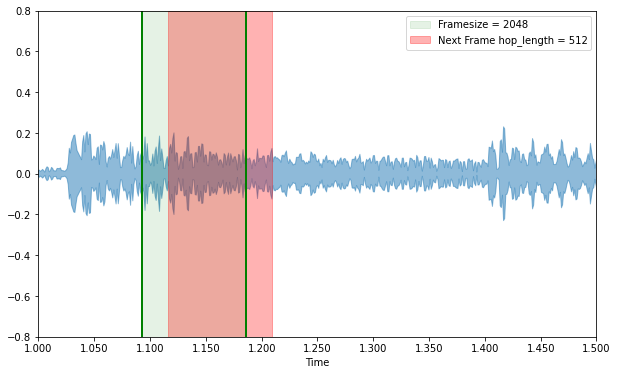

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 10 second long Audio file containing Piano recording
song, sr = librosa.load(r"datasets/AUDIO/Piano Sample/Leifur James - Mumma Dont Tell.wav")

print(f"sample_size = {song.size}")
print(f"sample_rate (sr) = {sr}")
print(f"data type of one single point = {type(song[0])}")

sample_duration = 1 /sr
song_duration = sample_duration*len(song)
print(f"sample_duration = {song_duration} seconds") 


fig,ax = plt.subplots(figsize = (10,6))
librosa.display.waveplot(song,ax=ax,alpha=0.5)
ax.set_ylim(-.8,.8)

ax.set_xlim(1,1.5)


ax.vlines(x=1+(2048/22050),ymin=-3, ymax=3, colors='green',lw=2)
ax.vlines(x=1+(4096/22050),ymin=-3, ymax=3, colors='green',lw=2)
ax.axvspan(1+(2048/22050), 1+(4096/22050), alpha=0.1, color='green',label = "Framesize = 2048")
ax.axvspan(1+(2560/22050), 1+(4608/22050), alpha=0.3, color='red',label="Next Frame hop_length = 512")
ax.legend()

#plt.savefig("hoplength.png")

In [3]:
import pickle
with open('Piano_sample.p', 'wb') as f:
    pickle.dump(song, f)

Text(0.5, 1.0, '2 Hz')

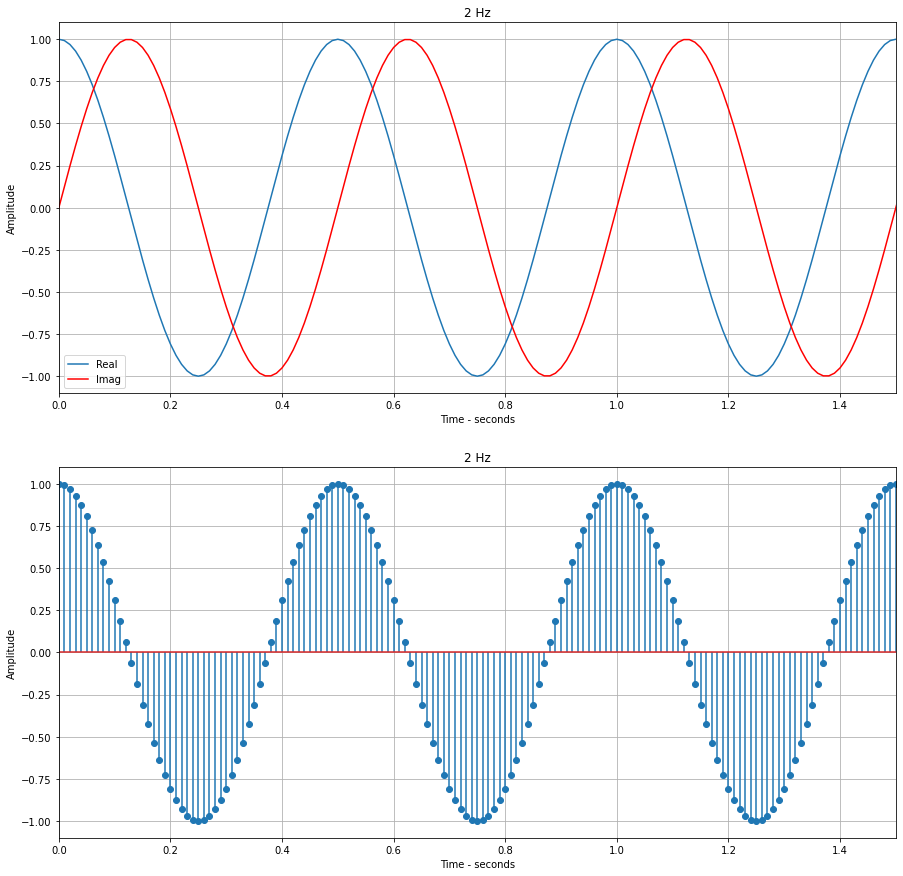

In [4]:
fs = 100.0
M = 400
n = np.arange(M)
u8 = np.exp(1j*2*np.pi*8*n/M) # Corresponds to 2 Hz

fig, axs = plt.subplots(2,figsize=(15,15))

axs[0].plot(n/fs, np.real(u8))
axs[0].axis(xmin=0,xmax=1.5)
axs[0].grid(True)
axs[0].plot(n/fs, np.imag(u8),'r')
axs[0].legend(("Real","Imag"))
axs[0].set_xlabel("Time - seconds")
axs[0].set_ylabel("Amplitude")
axs[0].set_title("2 Hz")


axs[1].stem(n/fs, np.real(u8))
axs[1].axis(xmin=0,xmax=1.5)
axs[1].grid(True)
axs[1].set_xlabel("Time - seconds")
axs[1].set_ylabel("Amplitude")
axs[1].set_title("2 Hz")

### Discrete Fourier Transform

In [5]:
fs = 22050
M =  220500
n = np.arange(M)
u1530 = np.exp(1j*2*np.pi*1537*n/M)
u1100 = np.exp(1j*2*np.pi*1100*n/M)
u3070 = np.exp(1j*2*np.pi*3070*n/M)
u20000 = np.exp(1j*2*np.pi*20000*n/M)

result1100 = sum(song*np.conjugate(u1100))/M
result1530 = sum(song*np.conjugate(u1530))/M
result3070 = sum(song*np.conjugate(u3070))/M
result20000 = sum(song*np.conjugate(u20000))/M

selfproject = sum(u1100*np.conjugate(u1100))/M
project_1100_on_1530 = sum(u1530*np.conjugate(u1100))/M
print("----------------------------------------------------------------")
print(f"Self-projection of a pure sinusoid = {selfproject.real}")
print(f"Projection on a different pure frequency sinusoid = {project_1100_on_1530.real}")
print("----------------------------------------------------------------")
print(f"Result at f = 154 = {abs(result1530.real)}")
print(f"Result at f = 110 = {abs(result1100.real)}")
print(f"Result at f = 308 = {abs(result3070.real)}")
print(f"Result at f = 2000 = {abs(result20000.real)}")
print("----------------------------------------------------------------")
print(f"projection_154 / projection_308 = {abs(result1530.real)/abs(result3070.real)}")
print(f"projection_154 / projection_110 = {abs(result1530.real)/abs(result1100.real)}")
print(f"projection_154 / projection_2000 = {abs(result1530.real)/abs(result20000.real)}")
print("----------------------------------------------------------------")


----------------------------------------------------------------
Self-projection of a pure sinusoid = 1.0
Projection on a different pure frequency sinusoid = -1.0983051203199967e-16
----------------------------------------------------------------
Result at f = 154 = 0.00474247866789151
Result at f = 110 = 8.254846034628037e-06
Result at f = 308 = 0.0012204210236550154
Result at f = 2000 = 7.752952621155595e-07
----------------------------------------------------------------
projection_154 / projection_308 = 3.8859365546558284
projection_154 / projection_110 = 574.5084339547232
projection_154 / projection_2000 = 6116.996839308213
----------------------------------------------------------------


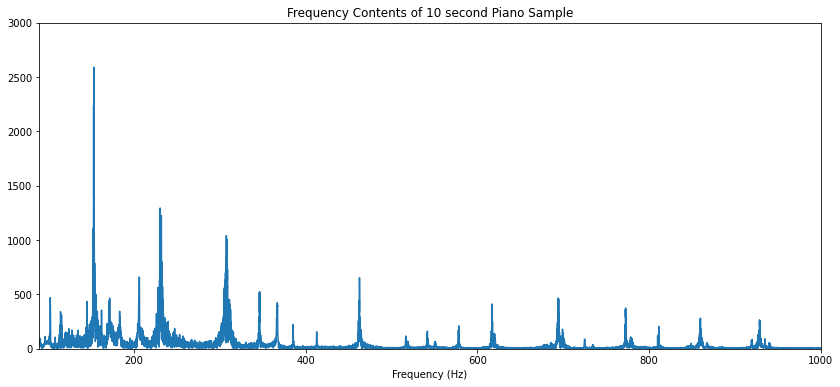

In [6]:
from numpy.fft import fft

def plot_magnitude_spectrum(signal, sr, f_ratio=1):
    X = np.fft.fft(signal)
    X_mag = np.absolute(X)
    
    plt.figure(figsize=(14,6))
    
    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)  
    
    plt.plot(f[:f_bins], X_mag[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title("Frequency Contents of 10 second Piano Sample")
    plt.xlim(90,1000)
    plt.ylim(0,3000)
plot_magnitude_spectrum(song,sr,f_ratio = 0.3)
plt.savefig("fft.png")

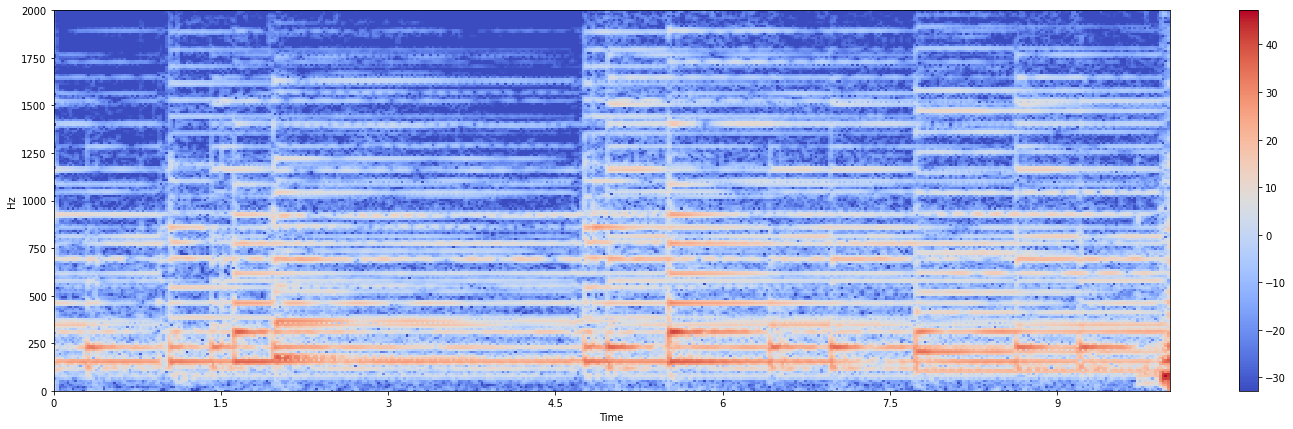

In [7]:
stft_ = librosa.stft(song)
stft_db = librosa.amplitude_to_db(abs(stft_))
plt.figure(figsize=(25, 7))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.ylim(0,2000)
plt.show()

In [8]:
ipd.Audio(r"datasets/AUDIO/Piano Sample/Leifur James - Mumma Dont Tell.wav") 

### Visualizing Spectral Features

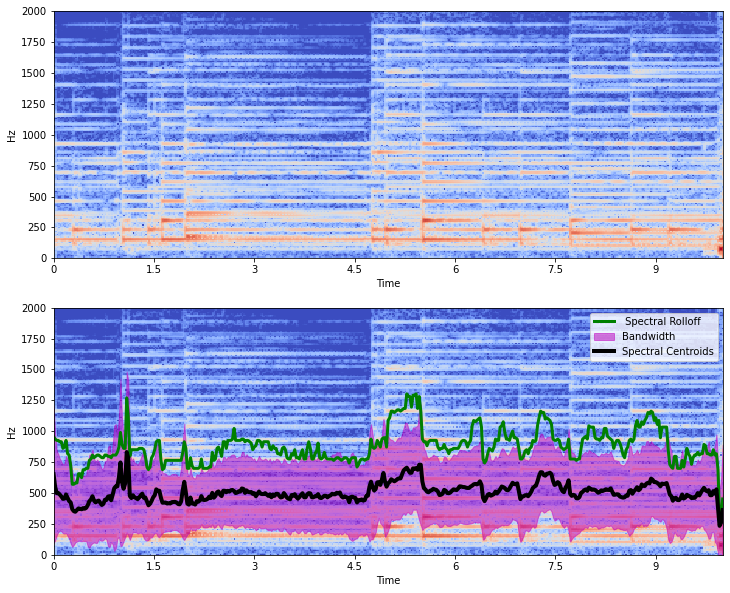

In [9]:
centroids = librosa.feature.spectral_centroid(S=abs(stft_))[0]
roll_off = librosa.feature.spectral_rolloff(S=abs(stft_))[0]

bandwidths = librosa.feature.spectral_bandwidth(S=abs(stft_))[0]
times_spec = np.linspace(0,10,431)


fig, ax = plt.subplots(2,figsize=(12, 10))

librosa.display.specshow(stft_db,ax=ax[0], x_axis='time', y_axis='hz')
librosa.display.specshow(stft_db,ax=ax[1], x_axis='time', y_axis='hz')
ax[0].set(ylim=[None, 2000])
ax[1].plot(times_spec, roll_off,color = "green",label =" Spectral Rolloff",linewidth=3)
ax[1].fill_between(times_spec, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5,color = "m",label = "Bandwidth")
ax[1].plot(times_spec, centroids,label = "Spectral Centroids",color ="black",linewidth=4)

ax[1].set(ylim=[None, 2000])
ax[1].legend()
plt.show()

chromogram_shape = (12, 431)


(431,)

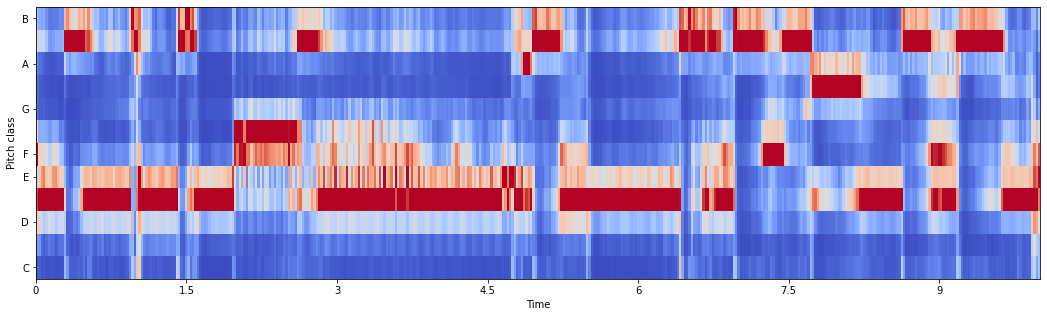

In [10]:
chromagram = librosa.feature.chroma_stft(song, sr=sr)
plt.figure(figsize=(18, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')
print(f"chromogram_shape = {chromagram.shape}")
chromagram[0].shape
#help(librosa.feature.chroma_stft)

### MEL FREQUENCY SPECTROGRAM

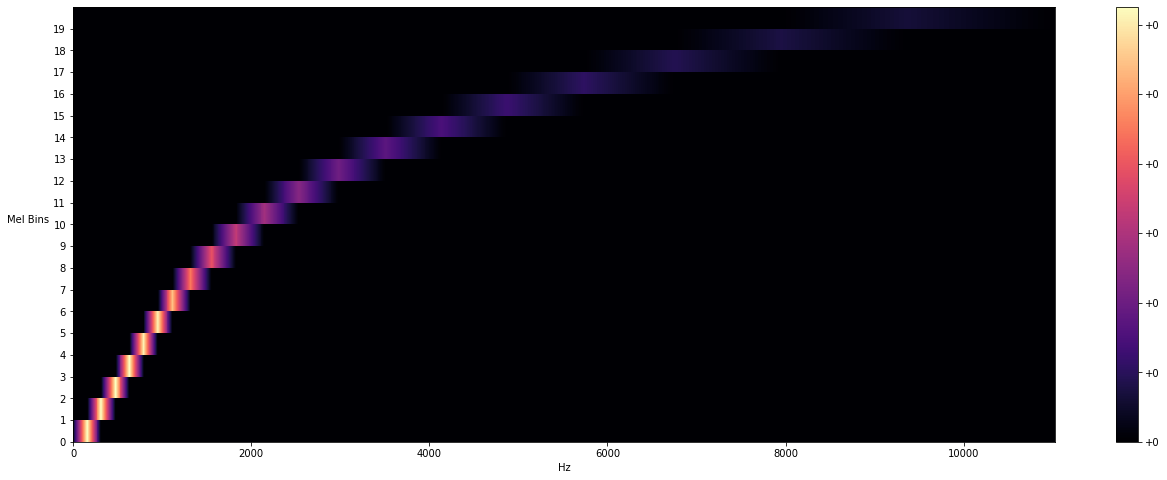

In [11]:
# THIS PLOT SHOWS THE FILTER BANKS 
#(THE FREQUENCY WINDOW FOR EACH MEL BIN AND THE INTENSITIES OF EACH FREQUENCY)
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=20)

plt.figure(figsize=(22, 8))
librosa.display.specshow(filter_banks,  #specshow shows spectrogram like variables
                         sr=sr, 
                         x_axis="linear")
plt.ylabel("Mel Bins", labelpad = 25, rotation = 0)
plt.yticks(ticks=list(range(0,20)))
plt.colorbar(format="%+2.f")
plt.show()

(20, 431)


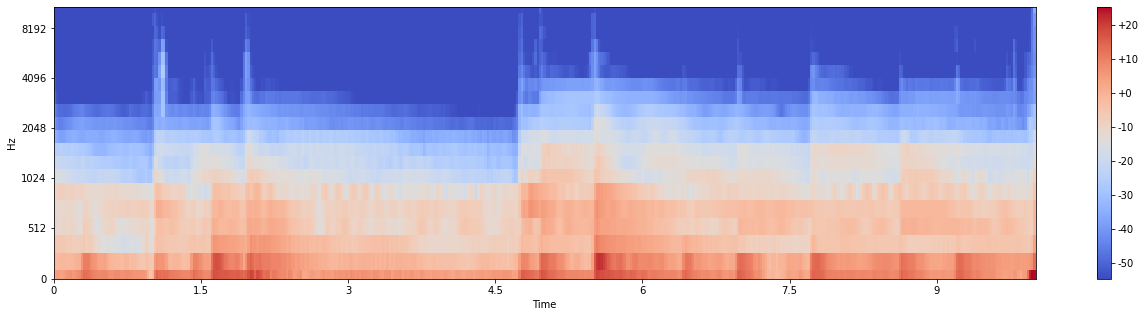

In [12]:
mel_spectrogram = librosa.feature.melspectrogram(song, sr=sr, n_fft=2048, hop_length=512, n_mels=20)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
print(log_mel_spectrogram.shape)

plt.figure(figsize=(22,5))
librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

### Tempogram (BPM)

137.8125


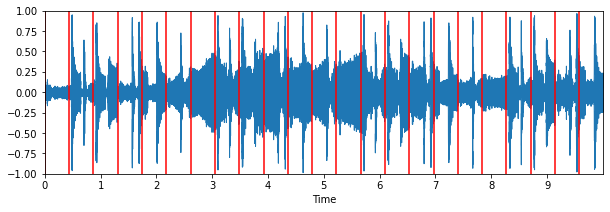

In [38]:
song2, sr = librosa.load(r"datasets/AUDIO/Piano Sample/Radiohead - Idioteque.wav")
#song2 = song
tempo = librosa.beat.tempo(song2,hop_length=256, sr=sr)
#tempo = round(tempo[0])
print(tempo[0]*2)

T = len(song2)/float(sr)
seconds_per_beat = 60.0/tempo[0]/2
beat_times = np.arange(0, T, seconds_per_beat)

plt.figure(figsize=(10,3))
librosa.display.waveplot(song2)
plt.vlines(beat_times, -1, 1, color='r')
plt.ylim((-1, 1))

clicks = librosa.clicks(beat_times, sr, length=len(song2))
ipd.Audio(song2 + clicks, rate=sr)

plt.savefig("fft.png")

### CREATING THE AUDIO FEATURE DATASET

In [14]:
def audio_features_extract(audio, sr = 22050):
    """
    Extract frequency domain features from audio sample using librosa.feature .
    Calculates the means and variances of the features below.
    
    rms
    zero_crossing_rate
    spectral_centroid
    spectral_rolloff
    spectral_bandwidth
    tempo
    20 x MFCC
    
    Parameters
    ----------
    audio : numpy.ndarray
        One dimensional array of numbers representing an .wav file.
        
    sr : int
        Sample rate of the audio file. Default is 22050.

    Returns
    ----------
       numeric_features : list
    
    ----------
    
    >>> len(numeric_features) 
    51
    """
    zero_crossings_rate= librosa.feature.zero_crossing_rate(audio)
    spectral_centroids = librosa.feature.spectral_centroid(audio, sr)
    spectral_rolloff   = librosa.feature.spectral_rolloff(audio, sr=sr)
    rms = librosa.feature.rms(audio,center=True)
    tempo = librosa.beat.tempo(audio,hop_length=256,sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
    mfcc = librosa.feature.mfcc(audio, sr=sr)
    

    
    return  ([np.mean(rms),np.var(rms),np.mean(zero_crossings_rate), np.var(zero_crossings_rate), np.mean(spectral_centroids),  np.var(spectral_centroids), np.mean(spectral_rolloff),
              np.var(spectral_rolloff), np.mean(spectral_bandwidth),  np.var(spectral_bandwidth),tempo[0] ] + [np.mean(e) for e in mfcc] + [np.var(e) for e in mfcc])

from time import time
start = time()
features = audio_features_extract(song)
print(f"Time taken to extract {len(features)} features from a sample :{time()-start:.3f}")


Time taken to extract 51 features from a sample :0.378


In [15]:
COLUMN_NAMES = ["file_name","genre_label","rms_mean","rms_var","zcr_mean","zcr_var", "spectral_centroid_mean", "spectral_centroid_var",
                "spectral_rolloff_mean","spectral_rolloff_var","spectral_bandwidth_mean", "spectral_bandwidth_var",
                "tempo",
                "mfcc0_mean","mfcc1_mean","mfcc2_mean","mfcc3_mean","mfcc4_mean","mfcc5_mean","mfcc6_mean",
                "mfcc7_mean","mfcc8_mean","mfcc9_mean","mfcc10_mean","mfcc11_mean","mfcc12_mean","mfcc13_mean",
                "mfcc14_mean","mfcc15_mean","mfcc16_mean","mfcc17_mean","mfcc18_mean","mfcc19_mean",
                
                "mfcc0_var","mfcc1_var","mfcc2_var","mfcc3_var","mfcc4_var","mfcc5_var","mfcc6_var","mfcc7_var","mfcc8_var",
                "mfcc9_var","mfcc10_var","mfcc11_var","mfcc12_var","mfcc13_var","mfcc14_var","mfcc15_var",
                "mfcc16_var","mfcc17_var","mfcc18_var", "mfcc19_var"]
    
df = pd.DataFrame(columns=COLUMN_NAMES)
df

Empty DataFrame
Columns: [file_name, genre_label, rms_mean, rms_var, zcr_mean, zcr_var, spectral_centroid_mean, spectral_centroid_var, spectral_rolloff_mean, spectral_rolloff_var, spectral_bandwidth_mean, spectral_bandwidth_var, tempo, mfcc0_mean, mfcc1_mean, mfcc2_mean, mfcc3_mean, mfcc4_mean, mfcc5_mean, mfcc6_mean, mfcc7_mean, mfcc8_mean, mfcc9_mean, mfcc10_mean, mfcc11_mean, mfcc12_mean, mfcc13_mean, mfcc14_mean, mfcc15_mean, mfcc16_mean, mfcc17_mean, mfcc18_mean, mfcc19_mean, mfcc0_var, mfcc1_var, mfcc2_var, mfcc3_var, mfcc4_var, mfcc5_var, mfcc6_var, mfcc7_var, mfcc8_var, mfcc9_var, mfcc10_var, mfcc11_var, mfcc12_var, mfcc13_var, mfcc14_var, mfcc15_var, mfcc16_var, mfcc17_var, mfcc18_var, mfcc19_var]
Index: []

[0 rows x 53 columns]

In [18]:
# for every .wav in a genre folder
#            - Extract the features
#            - Add it to the training dataset (w genre_label & file_name)

genres = ["Turkish Slow","Turkish Rap","Turkish Pop","Turkish Rock",
          "Turkish Classical Music","Turkish Folk Music"]

#genres =["blues","classical","country"]
#genres = ["disco","hiphop","jazz","metal","pop","rock"]

i=1
for genre in genres:
    folder_contents = os.listdir(str(os.getcwd()) + f"/datasets/AUDIO/{genre}")
    for file_name in folder_contents:
        print(f"{i}",end ="\r")
        i +=1
        sample, sr = librosa.load(fr"datasets/AUDIO/{genre}/{file_name}")
        features = audio_features_extract(sample)
        df.loc[len(df)] = [file_name ,genre]+features

In [19]:
pd.set_option("display.max_columns", None)
df.genre_label.value_counts()

Turkish Pop                99
Turkish Rock               95
Turkish Slow               80
Turkish Classical Music    62
Turkish Folk Music         61
Turkish Rap                51
Name: genre_label, dtype: int64

In [20]:
df.groupby("genre_label").spectral_rolloff_mean.describe()

count         mean          std          min  \
genre_label                                                             
Turkish Classical Music   62.0  4367.282837  1003.854559  2271.428183   
Turkish Folk Music        61.0  4840.466839  1322.874317  1835.393310   
Turkish Pop               99.0  6331.229788   730.684954  4741.876122   
Turkish Rap               51.0  4842.506449  1211.425311  1943.109287   
Turkish Rock              95.0  5073.035171   928.485765  2403.999771   
Turkish Slow              80.0  3819.018492   770.339754  1761.351066   

                                 25%          50%          75%          max  
genre_label                                                                  
Turkish Classical Music  3676.369765  4445.082634  5067.440916  6422.989777  
Turkish Folk Music       4104.922974  4976.568051  5681.643061  7196.936063  
Turkish Pop              5666.617282  6513.344296  6824.988699  7711.509673  
Turkish Rap              4041.972078  5042.416686  5828.753308  7165.110889  
Turkish Rock             4542.519129  5214.332584  5700.540820  7011.705552  
Turkish Slow             3329.015717  3727.379975  4183.730251  6173.109694

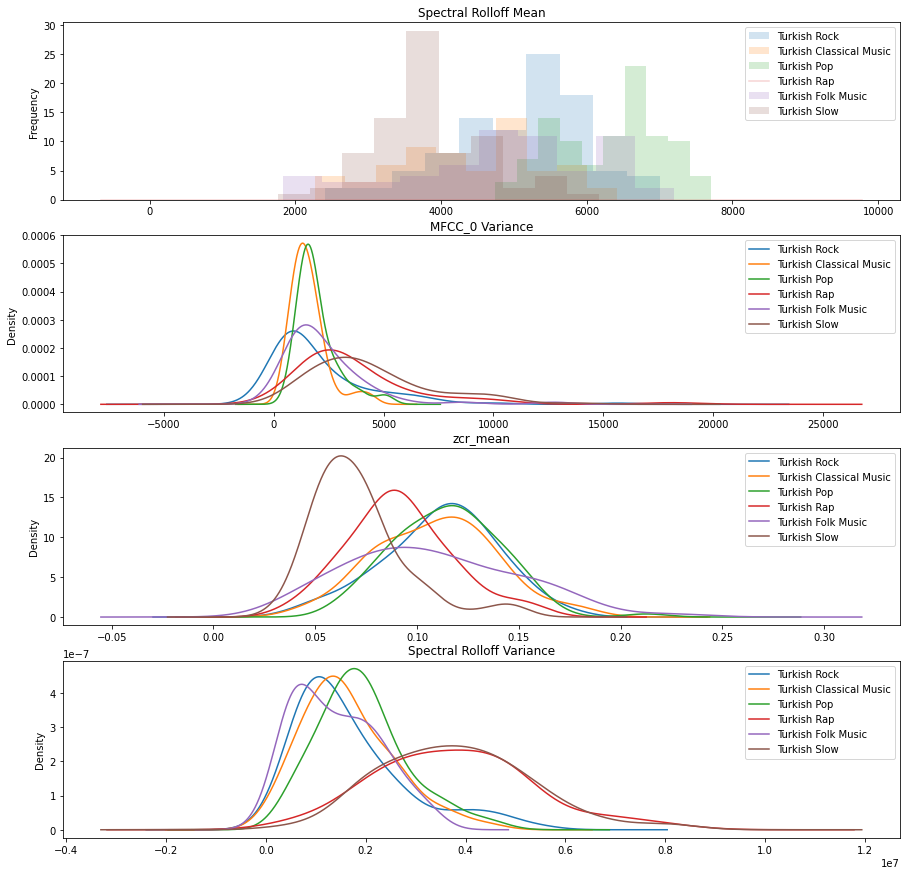

In [33]:
fig, axs = plt.subplots(4,figsize=(15,15))

df[df.genre_label == "Turkish Rock"].spectral_rolloff_mean.plot.hist(ax=axs[0], alpha = 0.2)
df[df.genre_label == "Turkish Classical Music"].spectral_rolloff_mean.plot.hist(ax=axs[0], alpha = 0.2)
df[df.genre_label == "Turkish Pop"].spectral_rolloff_mean.plot.hist(ax=axs[0], alpha = 0.2)
df[df.genre_label == "Turkish Rap"].spectral_rolloff_mean.plot.kde(ax=axs[0], alpha = 0.2)
df[df.genre_label == "Turkish Folk Music"].spectral_rolloff_mean.plot.hist(ax=axs[0], alpha = 0.2)
df[df.genre_label == "Turkish Slow"].spectral_rolloff_mean.plot.hist(ax=axs[0], alpha = 0.2)
axs[0].legend(["Turkish Rock", "Turkish Classical Music", "Turkish Pop",
               "Turkish Rap","Turkish Folk Music","Turkish Slow"])
axs[0].set_title("Spectral Rolloff Mean")

df[df.genre_label == "Turkish Rock"].mfcc0_var.plot.kde(ax=axs[1])
df[df.genre_label == "Turkish Classical Music"].mfcc0_var.plot.kde(ax=axs[1])
df[df.genre_label == "Turkish Pop"].mfcc0_var.plot.kde(ax=axs[1])
df[df.genre_label == "Turkish Rap"].mfcc0_var.plot.kde(ax=axs[1])
df[df.genre_label == "Turkish Folk Music"].mfcc0_var.plot.kde(ax=axs[1])
df[df.genre_label == "Turkish Slow"].mfcc0_var.plot.kde(ax=axs[1])
axs[1].legend(["Turkish Rock", "Turkish Classical Music", "Turkish Pop",
               "Turkish Rap","Turkish Folk Music","Turkish Slow"])
axs[1].set_title("MFCC_0 Variance")

df[df.genre_label == "Turkish Rock"].zcr_mean.plot.kde(ax=axs[2])
df[df.genre_label == "Turkish Classical Music"].zcr_mean.plot.kde(ax=axs[2])
df[df.genre_label == "Turkish Pop"].zcr_mean.plot.kde(ax=axs[2])
df[df.genre_label == "Turkish Rap"].zcr_mean.plot.kde(ax=axs[2])
df[df.genre_label == "Turkish Folk Music"].zcr_mean.plot.kde(ax=axs[2])
df[df.genre_label == "Turkish Slow"].zcr_mean.plot.kde(ax=axs[2])
axs[2].legend(["Turkish Rock", "Turkish Classical Music", "Turkish Pop",
               "Turkish Rap","Turkish Folk Music","Turkish Slow"])
axs[2].set_title("zcr_mean")

df[df.genre_label == "Turkish Rock"].spectral_rolloff_var.plot.kde(ax=axs[3])
df[df.genre_label == "Turkish Classical Music"].spectral_rolloff_var.plot.kde(ax=axs[3])
df[df.genre_label == "Turkish Pop"].spectral_rolloff_var.plot.kde(ax=axs[3])
df[df.genre_label == "Turkish Rap"].spectral_rolloff_var.plot.kde(ax=axs[3])
df[df.genre_label == "Turkish Folk Music"].spectral_rolloff_var.plot.kde(ax=axs[3])
df[df.genre_label == "Turkish Slow"].spectral_rolloff_var.plot.kde(ax=axs[3])
axs[3].legend(["Turkish Rock", "Turkish Classical Music", "Turkish Pop",
               "Turkish Rap","Turkish Folk Music","Turkish Slow"])
axs[3].set_title("Spectral Rolloff Variance")
plt.savefig("PDF.png")

In [22]:
# THINK TWICE BEFORE RUNNING THIS CELL !!!!!!!
# IT WILL OVERWRITE THE DATAFRAME THAT WE ARE GOING TO USE IN NOTEBOOK #3

# pickle the dataframe to use it on next Notebook
import pickle
outfile = open(r"datasets/turkish_songs_df",'wb') #write binary
pickle.dump(df,outfile)
outfile.close()


### EXTRA: Recommender System (Cosine Similarity) 

In [23]:
#Strip back the numeric contents of our dataframe
features = df.drop(['file_name', 'genre_label'], axis=1).values
labels = df.genre_label.values
file_names = df.file_name.values


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
features[0][0:5]

array([1.19099967e-01, 1.79811299e-03, 8.37997118e-02, 2.67207670e-03,
       1.96366495e+03])

In [24]:
song, sr = librosa.load(r"datasets/AUDIO/Turkish Rock/mor ve ötesi - Cambaz (Official Video).wav")
song_features = audio_features_extract(song)
scaled_new_data = scaler.transform(np.array(song_features).reshape(1, -1))

In [25]:
from scipy import spatial

def get_cosine_similarity(row):
    similarity = 1 - spatial.distance.cosine(row, scaled_new_data)
    return similarity

similarities = []
for row in scaled_data:
    similarities.append(get_cosine_similarity(row))
    
result = pd.DataFrame(columns = ["file_name",'genre','similarity'])
result["file_name"] = file_names
result["similarity"] = similarities
result["genre"] = labels

result.sort_values(by='similarity',ascending=False).head()

file_name         genre  \
276         mor ve ötesi - Cambaz (Official Video).wav  Turkish Rock   
288             PENTAGRAM - Şeytan Bunun Neresinde.wav  Turkish Rock   
312  Yok Öyle Kararlı Şeyler - Evde Ekmek Yok (BeTh...  Turkish Rock   
279                                   Namus Belası.wav  Turkish Rock   
281                        Ogün Sanlisoy - Bilmece.wav  Turkish Rock   

     similarity  
276    1.000000  
288    0.882085  
312    0.871089  
279    0.865866  
281    0.854155

In [26]:
def get_cosine_similarity(row,scaled_new_data):
    similarity = 1 - spatial.distance.cosine(row, scaled_new_data)
    return similarity


def similar_songs(sample_features,df_to_compare):
    features = df_to_compare.drop(['file_name', 'genre_label'], axis=1).values
    labels = df_to_compare.genre_label.values
    file_names = df_to_compare.file_name.values
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(features)

    scaled_new_data = scaler.transform(np.array(sample_features).reshape(1, -1))
    similarities = []
    for row in scaled_data:
        similarities.append(get_cosine_similarity(row,sample_features))
    
    result = pd.DataFrame(columns = ["file_name",'genre','similarity'])
    result["file_name"] = file_names
    result["similarity"] = similarities
    result["genre"] = labels
    return result.sort_values(by='similarity',ascending=False).head()